## Sentiment Trends


### 이재훈 (20224071)

In [24]:
import json
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from config import *

In [25]:
query = {
  "size": 0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      },
      "aggs": {
        "group_by_sentiment": {
          "terms": {
            "field": "sentiment.keyword"
          }
        }
      }
    }
  }
}

In [26]:
# dict to json 
query = json.dumps(query)

In [27]:
headers = {
    'Content-Type': 'application/json'
}

In [28]:
resp = requests.get(
    f"{ELASTICSEARCH_URL}/news/_search",
    headers=headers,
    data = query,
    auth = ELASTICSEARCH_AUTH,
)

In [29]:
resp.status_code

200

In [30]:
results = resp.json()

In [31]:
buckets = results['aggregations']['group_by_date']['buckets']

In [32]:
buckets

[{'key_as_string': '2023-08-01T00:00:00.000Z',
  'key': 1690848000000,
  'doc_count': 5549,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 {'key_as_string': '2023-08-02T00:00:00.000Z',
  'key': 1690934400000,
  'doc_count': 5710,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 {'key_as_string': '2023-08-03T00:00:00.000Z',
  'key': 1691020800000,
  'doc_count': 5288,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 {'key_as_string': '2023-08-04T00:00:00.000Z',
  'key': 1691107200000,
  'doc_count': 3774,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 {'key_as_string': '2023-08-05T00:00:00.000Z',
  'key': 1691193600000,
  'doc_count': 680,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}},
 

In [33]:
buffer = []

# 중첩된 데이터를 한 줄로 변경
for x in buckets:
    #print(json.dumps(x, indent=4))

    sents = x['group_by_sentiment']['buckets']

    # entry = {}
    # for s in sents:
    #     key = x['key']
    #     value = x['doc_count']
    #     entry[key] = value

    entry = {t['key']: t['doc_count'] for t in sents}
    entry['date'] = x['key_as_string']

    buffer.append(entry)
    

In [34]:
df = pd.DataFrame(buffer)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.loc['2023-08-01': ]

In [35]:
plt.rcParams['figure.figsize'] = (10, 4)

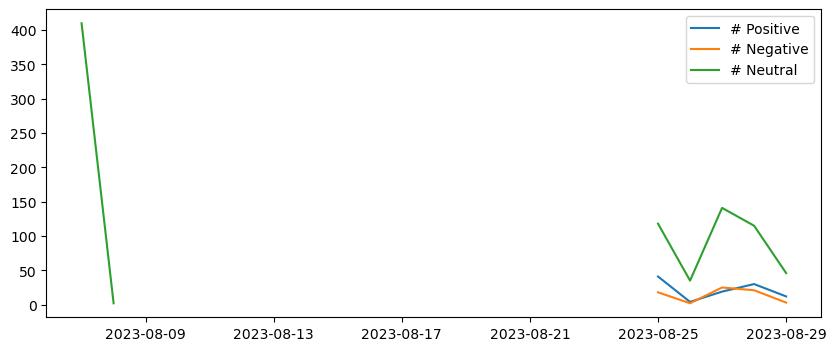

In [36]:
plt.plot(df['positive'], label='# Positive')
plt.plot(df['negative'], label='# Negative')
plt.plot(df['neutral'], label='# Neutral')
plt.legend()
plt.show()

In [37]:
df['sentiment'] = \
    (df['positive'] - df['negative']) / df.sum(axis=1)

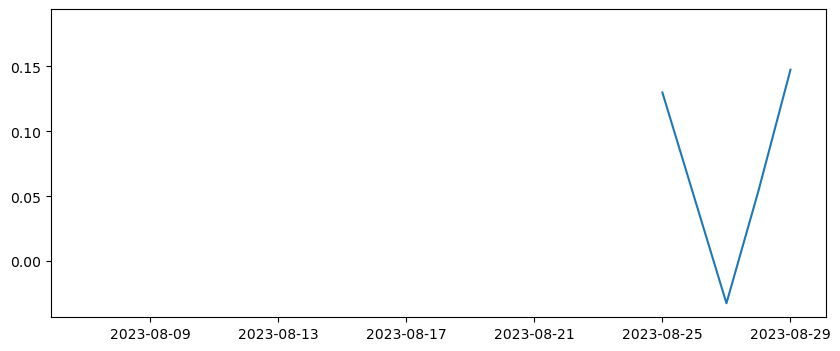

In [38]:
plt.plot(df['sentiment'])
plt.show()